In [21]:
import pandas as pd
import numpy as np
import math
import pingouin as pg
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity
from factor_analyzer import FactorAnalyzer


In [11]:
df = pd.read_excel("C:\\Users\\Ollie\\OneDrive\\打工仔\\代写\\ques_generated.xlsx")
df.head()

,A1,A2,A3,A4,B1,B2,B3,B4,C1,C2,...,D4,E1,E2,E3,E4,sex,age,education,income,buytime
0,4,3,4,5,4,3,5,4,3,3,...,5,5,5,3,4,1,3,3,1,1
1,4,3,4,4,3,2,4,3,5,5,...,4,5,4,3,4,2,1,4,1,4
2,4,3,3,4,4,3,5,4,5,3,...,2,3,5,5,5,2,3,4,2,3
3,4,3,5,5,3,4,2,2,4,5,...,3,5,2,4,5,1,2,3,2,2
4,4,3,3,5,5,3,3,3,4,4,...,3,5,5,4,5,2,1,3,2,3


## 信效度检验

- 利用pingouyin自带的cronbach_alpha函数进行信度检验
- 信度检验的目的是为了确保同一子量表（例如A1、A2、A3、A4）的各个问项具有充分的一致性，从而能够测量同一潜变量
- 利用factor_analyzer库进行炎症性因子分析
- 因子分析可以理解为是为了确保问卷确实可以被区分为特定数量的子量表，即不同子量表之间有一定的区分度

A量表的alpha系数： (np.float64(0.8562471570302798), array([0.825, 0.883]))
B量表的alpha系数： (np.float64(0.8564809989543793), array([0.825, 0.883]))
C量表的alpha系数： (np.float64(0.8478811565264831), array([0.815, 0.876]))
D量表的alpha系数： (np.float64(0.8794682488846934), array([0.853, 0.902]))
E量表的alpha系数： (np.float64(0.7952587947457184), array([0.751, 0.833]))
KMO值： 0.9456627165797155
检验通过：0.0
           0         1         2         3         4
A1  0.228897  0.197122  0.172202  0.096371  0.445340
A2  0.163205  0.060798  0.126758  0.128906  0.428093
A3  0.049258  0.033109  0.190765  0.052101  0.559907
A4  0.153520  0.116819  0.200819  0.050023  0.361733
B1  0.786274  0.085900 -0.010205  0.035649  0.125808
B2  0.763073  0.008256  0.099698 -0.058306 -0.095676
B3  0.750919 -0.006730  0.068964 -0.036225 -0.022170
B4  0.653133 -0.063545 -0.099992  0.150137  0.102122
C1  0.036077  0.895139 -0.005056 -0.002016  0.089630
C2 -0.088368  0.723787  0.136571 -0.030078 -0.082069
C3  0.028204  0.651104 -0.034978  0.09

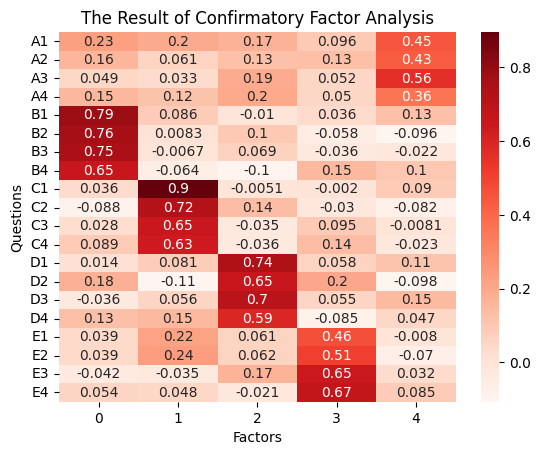

In [44]:
# 分别对A-E五个量表做信度检验

test_data = df[['A1', 'A2', 'A3', 'A4']]
print("A量表的alpha系数：", pg.cronbach_alpha(test_data))

test_data = df[['B1', 'B2', 'B3', 'B4']]
print("B量表的alpha系数：", pg.cronbach_alpha(test_data))

test_data = df[['C1', 'C2', 'C3', 'C4']]
print("C量表的alpha系数：", pg.cronbach_alpha(test_data))

test_data = df[['D1', 'D2', 'D3', 'D4']]
print("D量表的alpha系数：", pg.cronbach_alpha(test_data))

test_data = df[['E1', 'E2', 'E3', 'E4']]
print("E量表的alpha系数：", pg.cronbach_alpha(test_data))

# 对整份问卷（除了人口统计学数据）进行探索性因子分析

test_data = df.drop(['sex', 'age', 'education', 'buytime', 'income'], axis=1)
kmo_all, kmo_model = calculate_kmo(test_data)
print("KMO值：", kmo_model)

chi_square, p_value = calculate_bartlett_sphericity(test_data)
print("检验通过：{}".format(p_value) if p_value <= 0.05 else "检验未通过：{}".format(p_value))

faa = FactorAnalyzer(n_factors=5, rotation="oblimin") # 根据量表设置，因子间存在相关性，因此使用斜交旋转
faa.fit(test_data)
loading = pd.DataFrame(faa.loadings_, index = test_data.columns)
print(loading)

# 绘制热力图，来看题项和潜在因子之间的关系
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(loading, annot=True, cmap="Reds") # annot是选择是否在图上每个单元格显示数字，cmap是设置渐变色
plt.title("The Result of Confirmatory Factor Analysis")
plt.ylabel("Questions")
plt.xlabel("Factors")
plt.show()



### 信效度检验的结果

- KMO算出来的值十分接近1，意味着题项间的相关性很强，偏相关性很弱，即很适合进行因子分析
- 巴雷特球形检验通过了，意味着变量的相关矩阵非单位矩阵，即适合进行因子分析
- 考虑到我们的问卷设置中已经区分了5个因子，因此进行CFA即可，采用斜交旋转并设置因子个数为5
- 注意这里不应使用正交旋转，因为正交旋转的假设是因子间相互独立，这对我们的数据显然是不成立的
- 从热力图可以看到，我们设定的5个因子都被成功地捕获

# 描述性统计

- 首先将每个子量表进行平均值，计算出对应因子的得分
- 接着计算所有分数的均值和方差
- 最后检验人口统计学指标是否会对因子得分有影响（双变量分析），使用pingouin即可

In [64]:
df['A'] = np.mean([df.A1, df.A2, df.A3, df.A4], axis = 0) # axis=0控制其为对4个向量取均值；axis=1为对每个向量各自取均值；没有axis则是对所有值计算均值
df['B'] = np.mean([df.B1, df.B2, df.B3, df.B4], axis = 0)
df['C'] = np.mean([df.C1, df.C2, df.C3, df.C4], axis = 0)
df['D'] = np.mean([df.D1, df.D2, df.D3, df.D4], axis = 0)
df['E'] = np.mean([df.E1, df.E2, df.E3, df.E4], axis = 0)

test_data = df[['A', 'B', 'C', 'D', 'E']] 
print(test_data.describe()) # 计算因子得分的均值和方差，以及各分位数

# 定义一个函数，能够直接输出一个变量的所有取值及其占比
def descr(data, name):
    values = set(data[name])
    for x in values:
        print("{}中，取值为{}的个数为{}，占比为{:.3f}".format(name, x, sum(data[name]==x), sum(data[name]==x)/len(data[name])))

descr(df, "sex")
descr(df, "age")
descr(df, "education")
descr(df, "income")
descr(df, "buytime")

                A           B           C           D           E
count  254.000000  254.000000  254.000000  254.000000  254.000000
mean     3.415354    3.247047    3.546260    3.224409    3.584646
std      0.974335    0.931572    0.925365    1.074238    0.904927
min      1.500000    1.000000    1.250000    1.000000    1.250000
25%      2.562500    2.500000    3.000000    2.250000    3.000000
50%      3.750000    3.500000    3.750000    3.250000    3.750000
75%      4.250000    4.000000    4.250000    4.250000    4.250000
max      5.000000    5.000000    5.000000    5.000000    5.000000
sex中，取值为1的个数为103，占比为0.406
sex中，取值为2的个数为151，占比为0.594
age中，取值为1的个数为71，占比为0.280
age中，取值为2的个数为121，占比为0.476
age中，取值为3的个数为37，占比为0.146
age中，取值为4的个数为25，占比为0.098
education中，取值为1的个数为42，占比为0.165
education中，取值为2的个数为28，占比为0.110
education中，取值为3的个数为95，占比为0.374
education中，取值为4的个数为89，占比为0.350
income中，取值为1的个数为80，占比为0.315
income中，取值为2的个数为77，占比为0.303
income中，取值为3的个数为67，占比为0.264
income中，取值为4的个数为30，占比为0.118
buytime中，取值为1的个数为

In [ ]:
# 独立t检验和方差分析

